In [ ]:
'''
so regularization is required cause if there is high variance means, 
model tries to work good on training dataset and not gives good result on testing 
so it is overfitting

In regularization if we need to remove overfiiting we try to lower the value of m from liner equation as y almost depends on m(slope)

it tries to apply bias variance tradeoff 

here calculate loss function by = loss_function + lambda(m)^2 
and lambda is a hyperparameter


how the coeficent gets affected from lambda :
if we gradually increase the lambda till infinity the coeficent gets shrinked or decrease but will not get zero
and in this case higher values decreses more fast as comparision to lower values

how do lambda affects bias and variance
-lambda is small than bias will decrease and overfitt and variance increase
-lambda is large than bias will increase and underfitt and variance decreases

loss function graph moves to zero and shrink as we increase the lambda
'''


'\nso regularization is required cause if there is high variance means, \nmodel tries to work good on training dataset and not gives good result on testing \nso it is overfitting\n\nIn regularization if we need to remove overfiiting we try to lower the value of m from liner equation\n\nit tries to apply bias variance tradeoff \n\nhere calculate loss function by = loss_function + lambda(m)^2 \nand lambda is a hyperparameter\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
X = data.data
y = data.target

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
 

In [8]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [9]:
L.fit(X_train,y_train)

LinearRegression()

In [10]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [12]:
y_pred=L.predict(X_test)

In [13]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953252


In [24]:
#using Ridge regression from sklearn
from sklearn.linear_model import Ridge

R = Ridge(alpha=0.001)


In [25]:
R.fit(X_train,y_train)

Ridge(alpha=0.001)

In [26]:
print(R.coef_)
print(R.intercept_)

[  24.01614407 -246.40604384  493.5928598   329.08832995 -852.76773624
  479.42466903  131.86682689  243.03291973  748.96464364   90.15508276]
152.12463296924477


In [27]:
y_pred1=R.predict(X_test)

In [28]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5201448351821769
RMSE 48.6595717785925


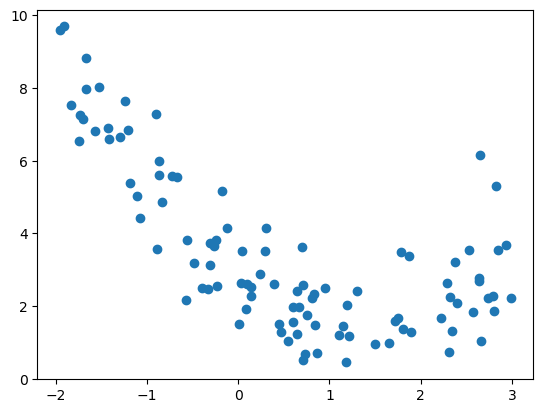

In [29]:
#Applying Ridge regression on polynomial random datset
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

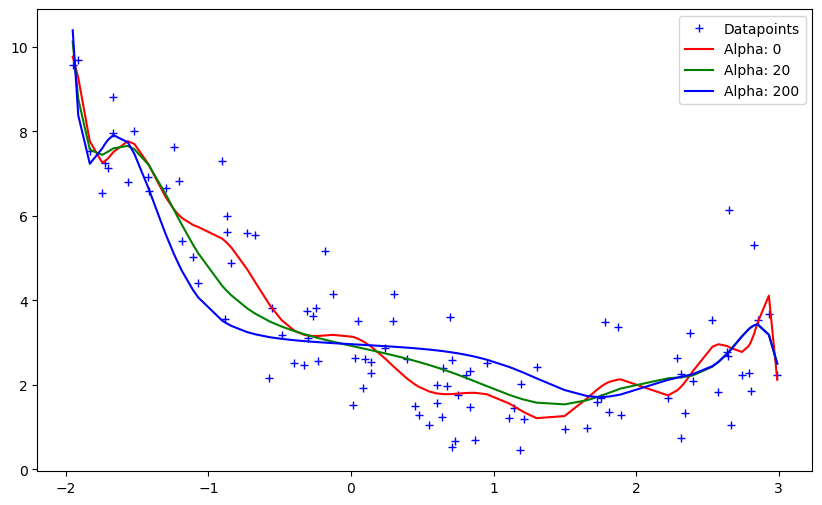

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_pred_ridge(x1,x2,alpha):
    model = Pipeline([
        ('poly_feat', PolynomialFeatures(degree=16)),
        ('Ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

#these are all alphas or lambda values 
alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas,cs):
    preds = get_pred_ridge(x1,x2,alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))
    
plt.legend()
plt.show()

